<a href="https://colab.research.google.com/github/huiesoo/esaa/blob/main/23-2/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2023.09.29 (금) 23:59

# **1. 라이브러리 및 데이터**


In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 데이터 불러오기
train=pd.read_csv("/content/drive/MyDrive/ESAA/23-2/movies_train.csv")

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [ ]:
print(train.shape)

(600, 12)


- 600개의 데이터가 있다는 것을 확인할 수 있다.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [ ]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- train은 dir_prev_bfnum 변수에 결측값이 존재한다.

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [ ]:
train['release_time']=pd.to_datetime(train['release_time'])

## 5) 데이터 시각화 및 분석

### 5-1) 배급사와 관객수


사용 변수
- **distributor** : 배급사
- **box_off_num** : 관객수

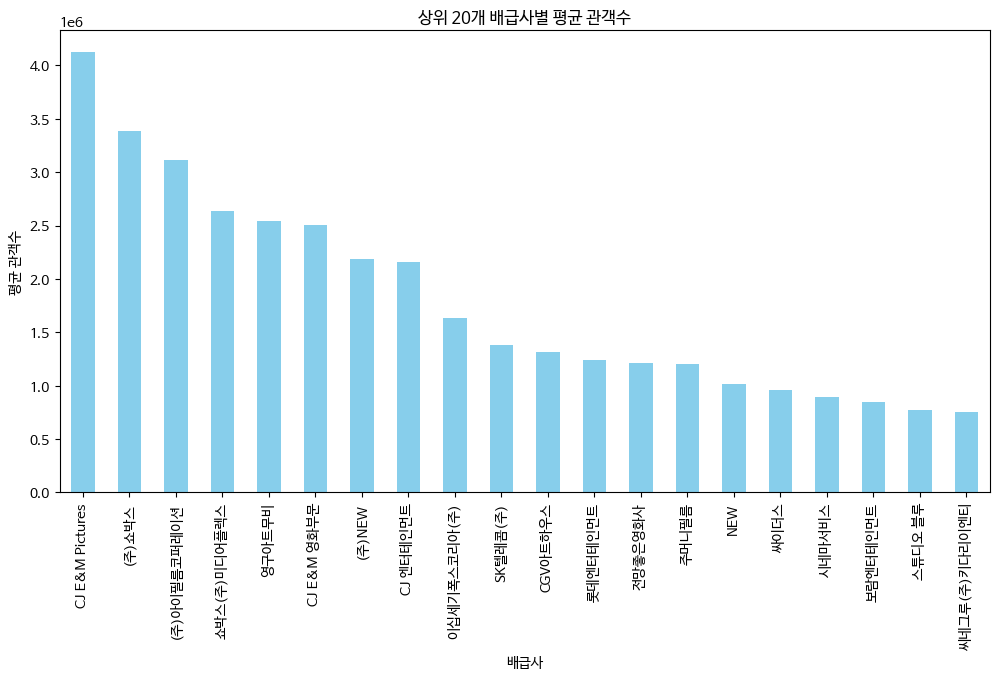

In [ ]:
# 상위 20개 배급사별 평균 관객수 계산
mean_box_office = train.groupby('distributor')['box_off_num'].mean().sort_values(ascending=False).head(20)

# 시각화
plt.figure(figsize=(12, 6))
mean_box_office.plot(kind='bar', color='skyblue')
plt.title('상위 20개 배급사별 평균 관객수')
plt.xlabel('배급사')
plt.ylabel('평균 관객수')
plt.xticks(rotation=90)
plt.show()

그래프 해석
- CJ, 쇼박스, New의 계열사가 상위권을 차지한 것을 알 수 있다.

### 5-2) 스태프수와 관객수


사용 변수
- **num_staff** : 스텝수
- **box_off_num** : 관객수

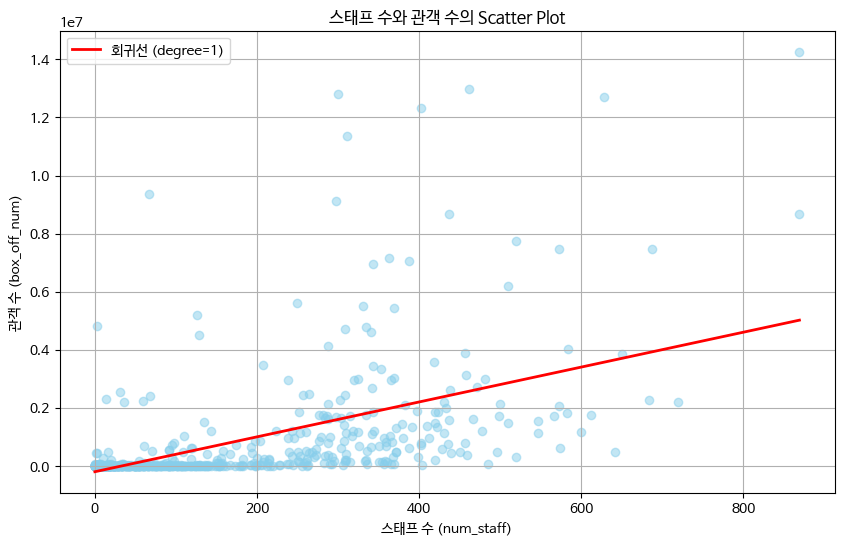

In [ ]:
# 회귀선을 위한 다항식 차수를 설정. 선형 회귀인 경우 degree=1
degree = 1

# 다항식 회귀 모델 만들기
coefficients = np.polyfit(train['num_staff'], train['box_off_num'], degree)

# 회귀선을 그리기 위한 x값 범위를 생성
x_range = np.linspace(min(train['num_staff']), max(train['num_staff']), 100)

# 다항식 회귀 모델을 이용하여 y값을 예측
y_pred = np.polyval(coefficients, x_range)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(train['num_staff'], train['box_off_num'], alpha=0.5 , color='skyblue')
plt.title('스태프 수와 관객 수의 Scatter Plot')
plt.xlabel('스태프 수 (num_staff)')
plt.ylabel('관객 수 (box_off_num)')

# 회귀선 그리기
plt.plot(x_range, y_pred, color='red', linewidth=2, label=f'회귀선 (degree={degree})')

plt.grid(True)
plt.legend()
plt.show()

그래프 해석
- 관객수가 많은 영화들은 관객수가 적은 영화보다 스태프 수가 많은 경향이 있다.

### 5-3) 감독의 명성, 전작들의 관객수 그리고 주연배우수


사용 변수
- **dir_prev_bfnum** : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- **director** : 감독이름
- **box_off_num** : 관객수

<Figure size 1200x600 with 0 Axes>

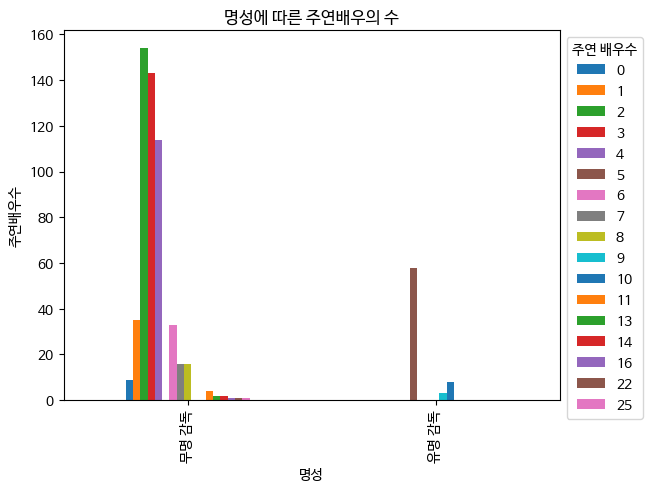

In [ ]:
# 'dir_prev_bfnum' 열의 데이터 타입을 float로 변환
train['dir_prev_bfnum'] = train['dir_prev_bfnum'].astype(float)

# 각 감독의 'dir_prev_bfnum'의 평균을 계산
mean_dir_prev_bfnum_per_director = train.groupby('director')['dir_prev_bfnum'].mean()

# 모든 감독의 평균 'dir_prev_bfnum' 값을 다시 평균
overall_mean_dir_prev_bfnum = mean_dir_prev_bfnum_per_director.mean()

# 유명 감독 무명 감독 정의
def dir_famous(director):
    if mean_dir_prev_bfnum_per_director[director] <= overall_mean_dir_prev_bfnum:
        return '무명 감독'
    else:
        return '유명 감독'

# 주연 배우수를 기반으로 명성 열 추가
train['fame'] = train['num_actor'].apply(dir_famous)

# 명성에 따 주연배우의 수
fame_actor_counts = train.groupby(['fame','num_actor']).size().unstack().fillna(0)

# 시각화
plt.figure(figsize=(12, 6))
fame_actor_counts.plot(kind='bar')
plt.title('명성에 따른 주연배우의 수')
plt.xlabel('명성')
plt.ylabel('주연배우수')
plt.legend(title='주연 배우수', bbox_to_anchor=(1, 1))
plt.show()

그래프 해석
- 대중적으로 유명한 감독일수록 몸값이 높은 탑스타를 주연으로 쓸 것이기 떄문에 주연배우수가 적을 것이라는 가설을 세운다.
- 감독별 전작들의 관객수의 평균을 기준으로 유명 감독과 무명 감독을 나누고 명성에 따른 주연 배우수를 그래프로 그린 결과, 무명감독이 훨씬 많은 수의 주연 배우를 쓴다는 것을 알 수 있다.
- 따라서 해당 가설은 채택된다.

### 5-4) 명성에 따른 관객수와 전작들의 수


사용 변수
- **dir_prev_bfnum** : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- **box_off_num** : 관객수
- fame : 5-3)에서 새로 만든 변수

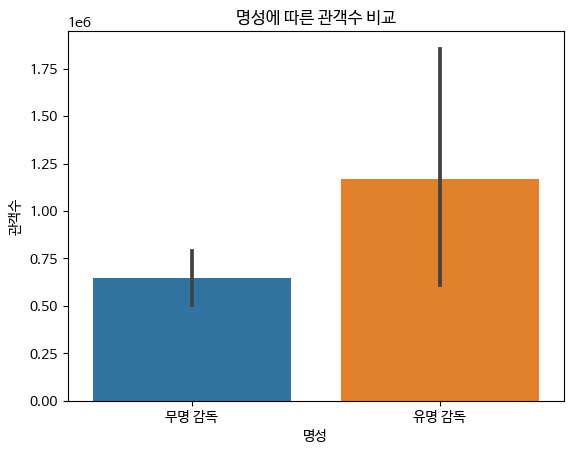

In [ ]:
sns.barplot(x='fame', y='box_off_num', data=train)
plt.xlabel('명성')
plt.ylabel('관객수')
plt.title('명성에 따른 관객수 비교')
plt.show()

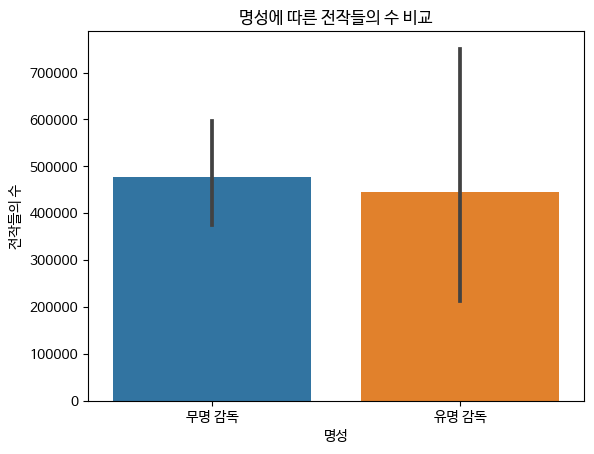

In [ ]:
sns.barplot(x='fame', y='dir_prev_num', data=train)
plt.xlabel('명성')
plt.ylabel('전작들의 수')
plt.title('명성에 따른 전작들의 수 비교')
plt.show()

그래프 해석
- 유명 감독이 무명 감독보다 이전에 만든 영화의 수가 더 많고, 해당 영화의 관객수가 많을 것이라는 가설을 세운다.
- 유명 감독의 관객수가 무명 감독에 비해 더 높은 것은 맞으나 유명 감독과 무명 감독 간의 전작들의 수는 유의미한 차이를 보이지 않는다.
- 따라서 가설은 관객수 관련으로는 채택되나 전작들의 수에 관해서는 기각된다.

### 5-5) 스태프수와 관객수


사용 변수
- **num_actor** : 주연배우수
- **box_off_num** : 관객수

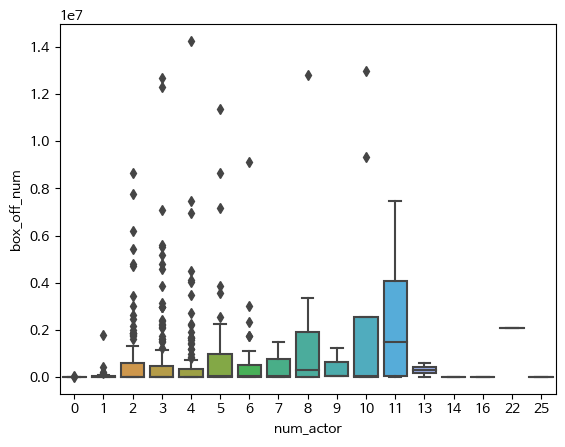

In [ ]:
ax5 = sns.boxplot(x="num_actor",y="box_off_num",data=train)

그래프 해석
- 주연배우가 많으면 관객 수가 많아지는 경향이 어느 정도 있다고 볼 수 있다.

### 5-6) 상영등급과 관객수


사용 변수
- **screening_rat** : 상영등급
- **box_off_num** : 관객수

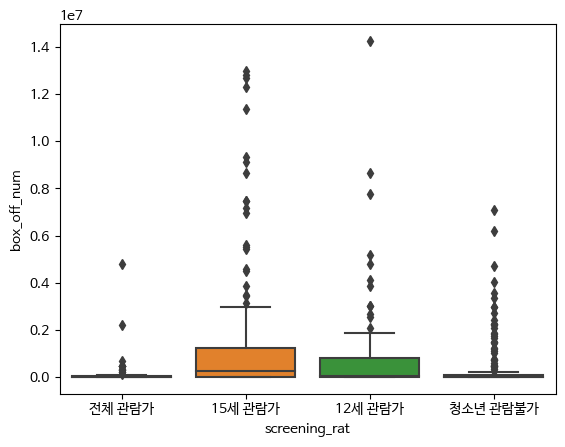

In [ ]:
ax6= sns.boxplot(x="screening_rat",y="box_off_num",data=train,order= ["전체 관람가","15세 관람가","12세 관람가","청소년 관람불가"])

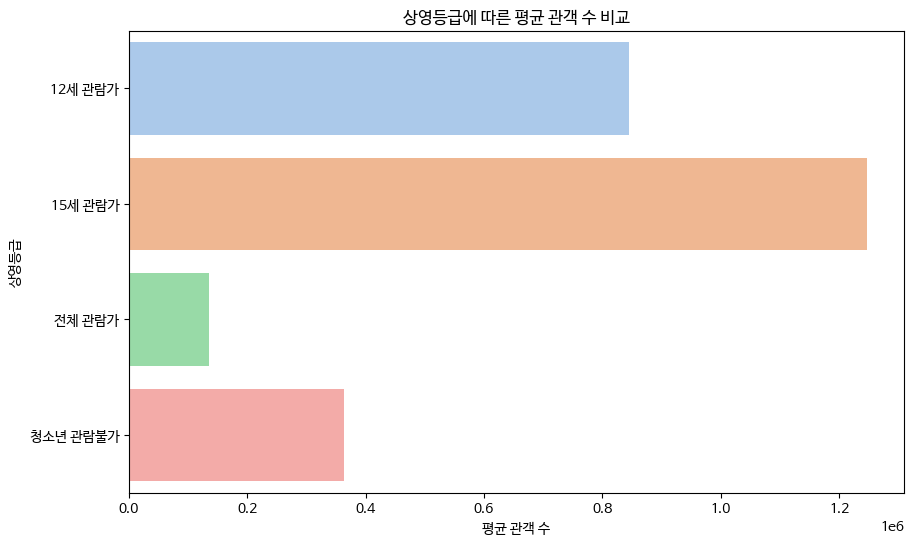

In [ ]:
# 데이터를 groupby하여 평균 관객 수 계산
a6 = train[['screening_rat', 'box_off_num']].groupby('screening_rat').mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='box_off_num', y='screening_rat', data=a6, palette='pastel')
plt.xlabel('평균 관객 수')
plt.ylabel('상영등급')
plt.title('상영등급에 따른 평균 관객 수 비교')
plt.show()

그래프 해석
- 15세 관람가가 가장 관객 수가 많음을 알 수 있다.
- 15세 관람가, 12세관람가, 청소년 관람불가, 전체 관람가 순으로 평균 관객수가 줄어든다.

### 5-7) 장르와 스텝수


사용 변수
- **genre** : 장르
- **num_staff** : 스텝수

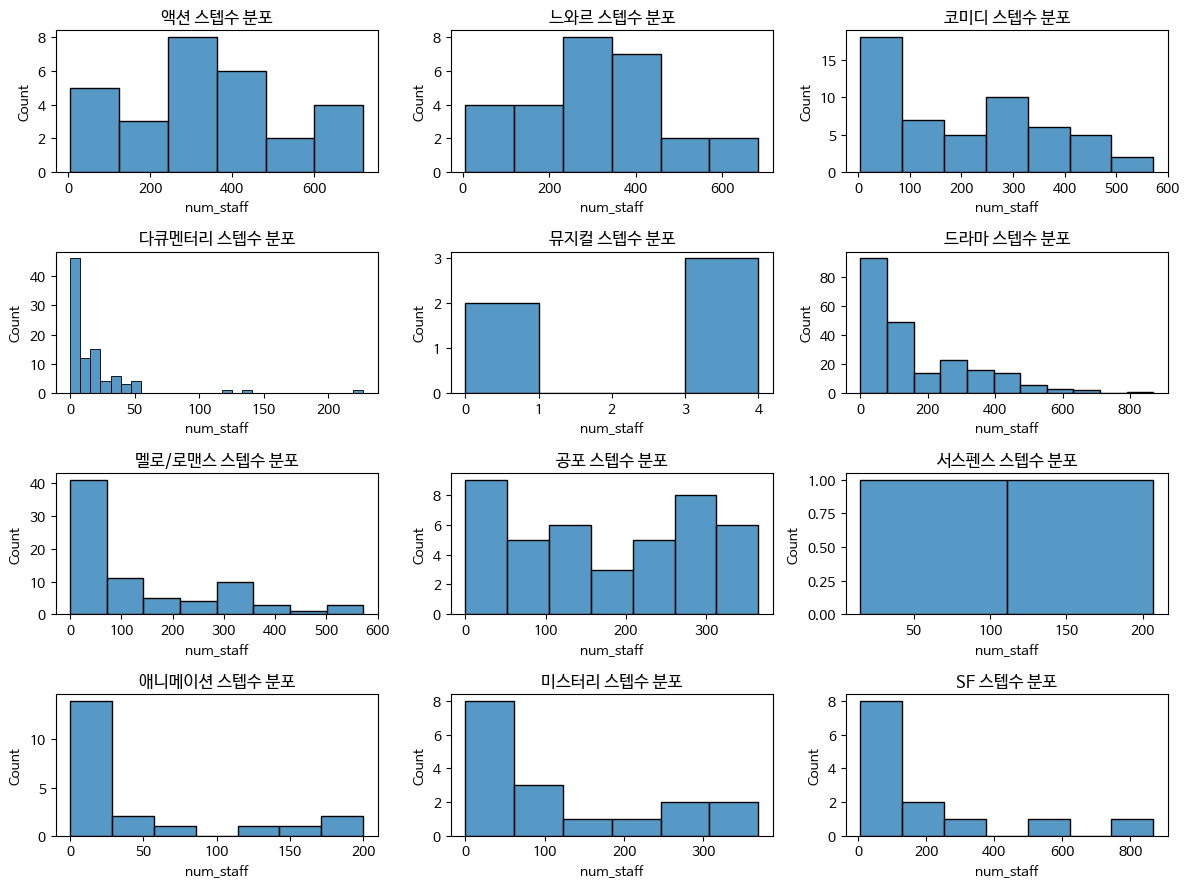

In [ ]:
fig = plt.figure(figsize=(12, 9))
for ind, genre in enumerate(train["genre"].unique()):
    mv_by_genre = train[train["genre"] == genre]
    ax = fig.add_subplot(4, 3, ind + 1)
    sns.histplot(data=mv_by_genre, x="num_staff", ax=ax)
    ax.set_title(f"{genre} 스텝수 분포")
fig.tight_layout()
plt.show()

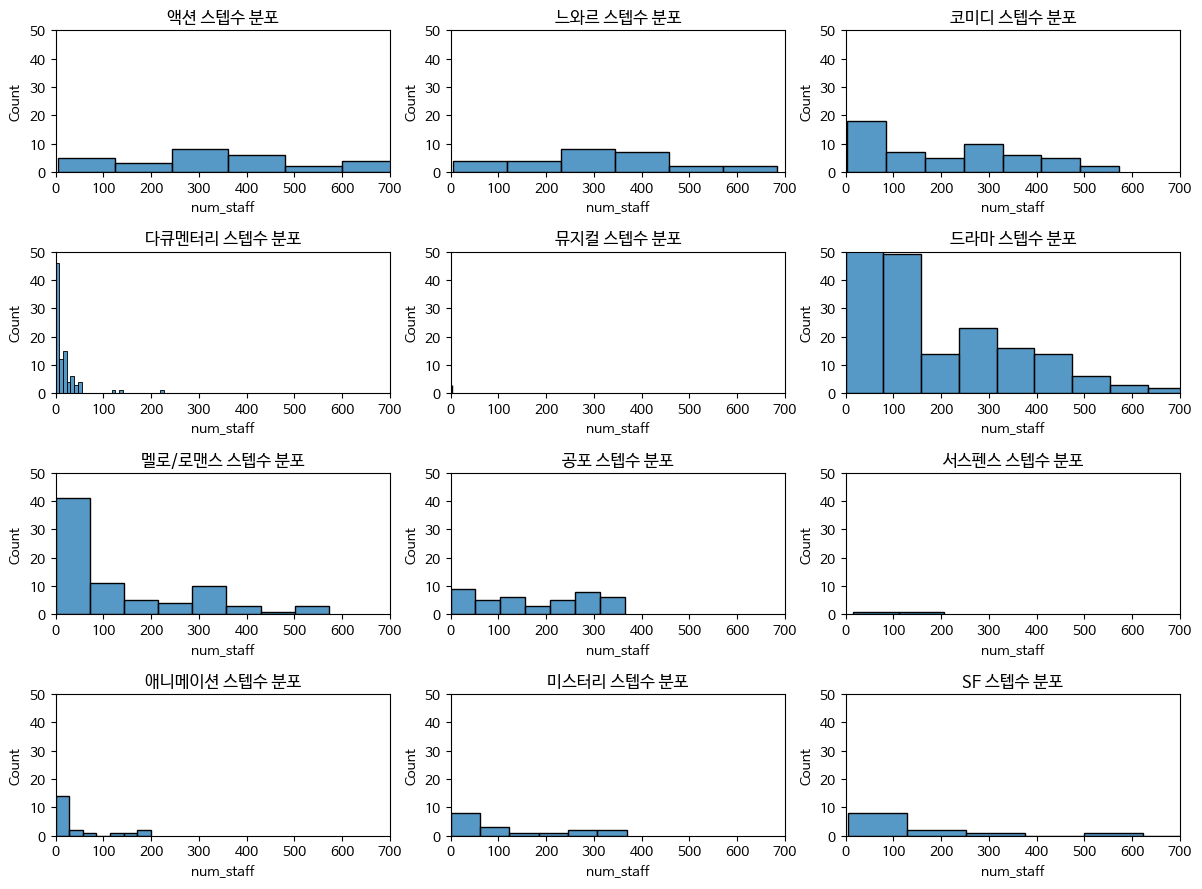

In [ ]:
# x축, y축 통일 버전

fig = plt.figure(figsize=(12, 9))

# 공통 x축과 y축 범위 설정
common_xlim = (0, 700)
common_ylim = (0, 50)

for ind, genre in enumerate(train["genre"].unique()):
    mv_by_genre = train[train["genre"] == genre]
    ax = fig.add_subplot(4, 3, ind + 1)
    sns.histplot(data=mv_by_genre, x="num_staff", ax=ax)

    # x축과 y축 범위 설정
    ax.set_xlim(common_xlim)
    ax.set_ylim(common_ylim)

    ax.set_title(f"{genre} 스텝수 분포")

fig.tight_layout()
plt.show()

그래프 해석
- 액션 장르와 느와르 장르가 대체적으로 스태프 수가 많음을 알 수 있다.
- 다큐멘터리와 뮤지컬은 스태프 수가 대체적으로 적다.

### 5-8) 계절별 장르에 따른 영화 개봉 개수


사용 변수
- **release_time** : 개봉일
- **genre** : 장르

In [ ]:
spring = train[(train['release_time'].dt.month==3) | (train['release_time'].dt.month==4) | (train['release_time'].dt.month==5)]
summer = train[(train['release_time'].dt.month==6) | (train['release_time'].dt.month==7) | (train['release_time'].dt.month==8)]
fall = train[(train['release_time'].dt.month==9) | (train['release_time'].dt.month==10) | (train['release_time'].dt.month==11)]
winter = train[(train['release_time'].dt.month==12) | (train['release_time'].dt.month==1) | (train['release_time'].dt.month==2)]

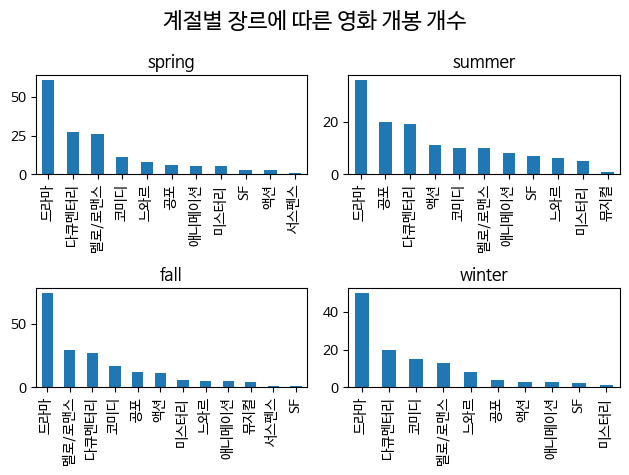

In [ ]:
plt.subplot(2,2,1)
spring['genre'].value_counts().plot(kind='bar')
plt.title('spring')
plt.subplot(2,2,2)
summer['genre'].value_counts().plot(kind='bar')
plt.title('summer')
plt.subplot(2,2,3)
fall['genre'].value_counts().plot(kind='bar')
plt.title('fall')
plt.subplot(2,2,4)
winter['genre'].value_counts().plot(kind='bar')
plt.title('winter')
plt.suptitle('계절별 장르에 따른 영화 개봉 개수', fontsize=16)
plt.tight_layout()
plt.show()

그래프 해석
- 모든 계절에서 드라마가 가장 많은 비율을 차지한다.
- 봄에는 드라마에 이어 다큐멘터리와 멜로/로맨스가 많이 개봉된다.
- 여름에는 드라마에 이어 공포와 다큐멘터리가 많이 개봉된다.
- 가을에는 드라마에 이어 멜로/로맨스와 다큐멘터리가 개봉된다.
- 겨울에는 드라마에 이어 다큐멘터리, 코미디가 많이 개봉된다.
- 다큐멘터리는 모든 계절에서 많은 비율을 차지한다.


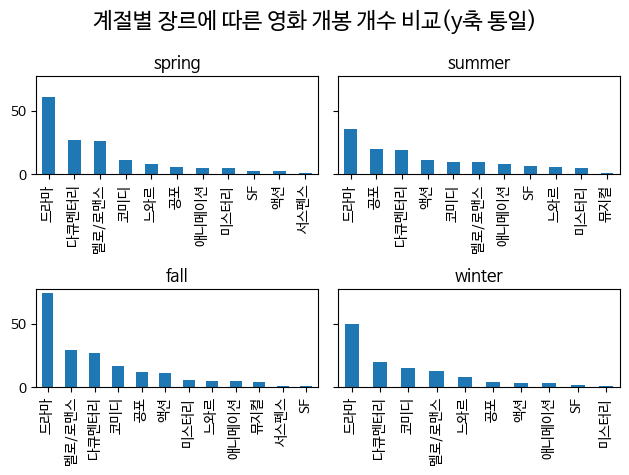

In [ ]:
plt.subplots(2, 2, sharey=True)
plt.subplot(2,2,1)
spring['genre'].value_counts().plot(kind='bar')
plt.title('spring')
plt.subplot(2,2,2)
summer['genre'].value_counts().plot(kind='bar')
plt.title('summer')
plt.subplot(2,2,3)
fall['genre'].value_counts().plot(kind='bar')
plt.title('fall')
plt.subplot(2,2,4)
winter['genre'].value_counts().plot(kind='bar')
plt.title('winter')
plt.tight_layout()
plt.suptitle('계절별 장르에 따른 영화 개봉 개수 비교(y축 통일)', fontsize=16)
plt.tight_layout()
plt.show()

그래프 해석
- 멜로/로맨스는 봄, 가을에 많이 개봉된다.
- 공포, 액션은 여름에 많이 개봉된다.
- 다큐멘터리, 코미디는 모든 계절에 일정하게 개봉된다.


<Figure size 1200x600 with 0 Axes>

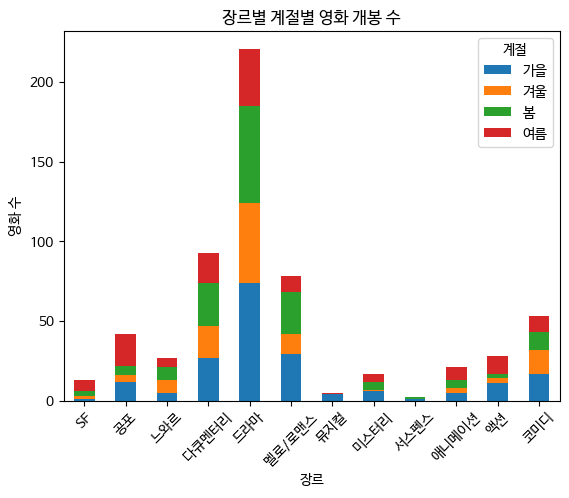

In [ ]:
# 개봉일을 월(month)로 추출
train['release_month'] = pd.to_datetime(train['release_time']).dt.month

# 계절 정의
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

# 개봉월을 기반으로 계절 열 추가
train['season'] = train['release_month'].apply(get_season)

# 장르별, 계절별 영화 수 집계
genre_season_counts = train.groupby(['genre', 'season']).size().unstack().fillna(0)

# 시각화
plt.figure(figsize=(12, 6))
genre_season_counts.plot(kind='bar', stacked=True)
plt.title('장르별 계절별 영화 개봉 수')
plt.xlabel('장르')
plt.ylabel('영화 수')
plt.legend(title='계절', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

### 5-9) 계절별 장르에 따른 관객수


사용 변수
- **release_time** : 개봉일
- **genre** : 장르
- **box_off_num** : 관객수

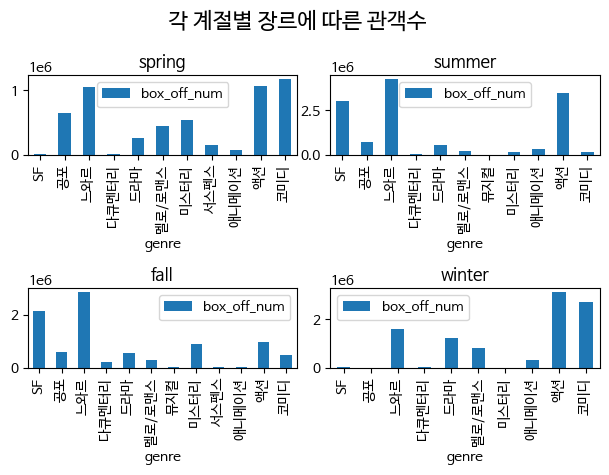

In [ ]:
fig, axs = plt.subplots(2, 2)
spring[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('spring')
summer[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('summer')
fall[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('fall')
winter[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('winter')
plt.suptitle(' 각 계절별 장르에 따른 관객수', fontsize=16)
plt.tight_layout()
plt.show()

그래프 해석
- 봄에는 코미디와 액션의 관객수가 가장 많다.
- 여름에는 느와르와 액션의 관객수가 가장 많다.
- 가을에는 느와르와 SF의 관객수가 가장 많다.
- 겨울에는 액션과 코미디의 관객수가 가장 많다.

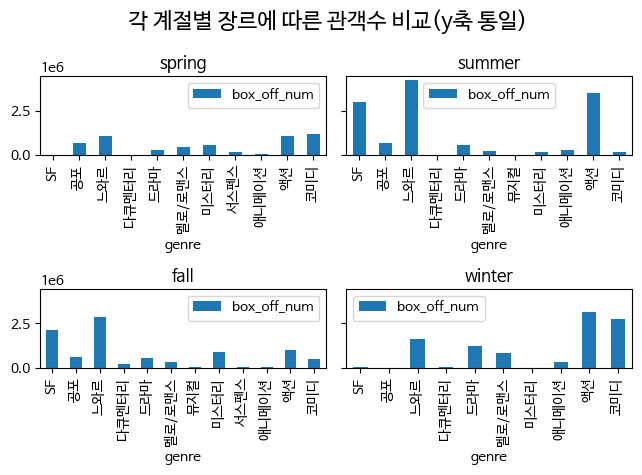

In [ ]:
fig, axs = plt.subplots(2, 2, sharey=True)
spring[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('spring')
summer[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('summer')
fall[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('fall')
winter[['genre', 'box_off_num']].groupby('genre').mean().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('winter')
plt.suptitle('각 계절별 장르에 따른 관객수 비교(y축 통일)', fontsize=16)
plt.tight_layout()
plt.show()

그래프 해석
- SF는 봄, 겨울에 적은 관객수를, 여름, 가을에 많은 관객수를 가진다.
- SF, 느와르, 액션은 여름에 관객수가 많고, 이어 SF, 느와르는 가을에, 액션과 느와르는 겨울에도 관객수가 많다.
- 코미디는 겨울에 관객수가 많다.


<Figure size 1200x600 with 0 Axes>

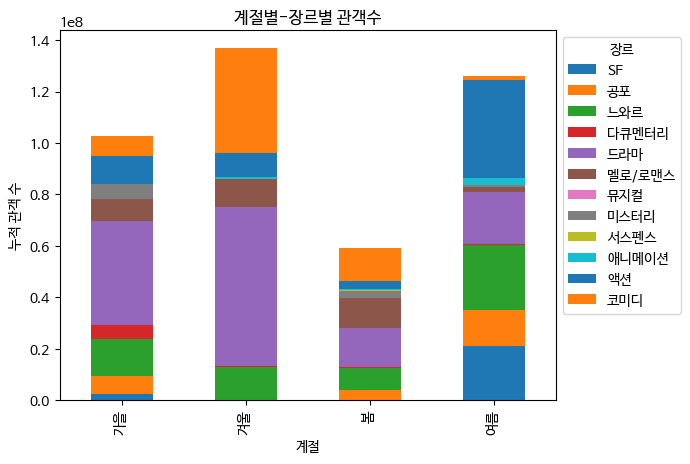

In [ ]:
# 개봉일을 월(month)로 추출
train['release_month'] = pd.to_datetime(train['release_time']).dt.month

# 계절 정의
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:
        return '겨울'

# 개봉월을 기반으로 계절 열 추가
train['season'] = train['release_month'].apply(get_season)

# 계절별, 장르별 관객수의 합 계산
season_genre_box_office = train.groupby(['season', 'genre'])['box_off_num'].sum().unstack()

# 시각화
plt.figure(figsize=(12, 6))
season_genre_box_office.plot(kind='bar', stacked=True)
plt.title('계절별-장르별 관객수')
plt.xlabel('계절')
plt.ylabel('누적 관객 수')
plt.legend(title='장르', bbox_to_anchor=(1, 1))
plt.show()

#### 계절별 장르에 따른 영화 개봉 개수와 관객수(5-8,8-9 비교)
- 모든 계절에서 드라마, 다큐멘터리는 많은 개봉 비율을 차지하지만 관객수는 많지 않다.
- 봄에는 멜로/드라마가 많이 개봉되지만 관객수는 비교적 적다.
- 여름에는 공포가 많이 개봉되지만 관객수는 비교적 적다.
- 가을에는 멜로/드라마가 많이 개봉되지만 관객수는 비교적 적다.
- 겨울에는 코미디가 많이 개봉되고 관객수도 많다.

### 5-10) 장르에 따른 상영시간


사용 변수
- **genre** : 장르
- **time** : 상영시간(분)

<Axes: xlabel='genre'>

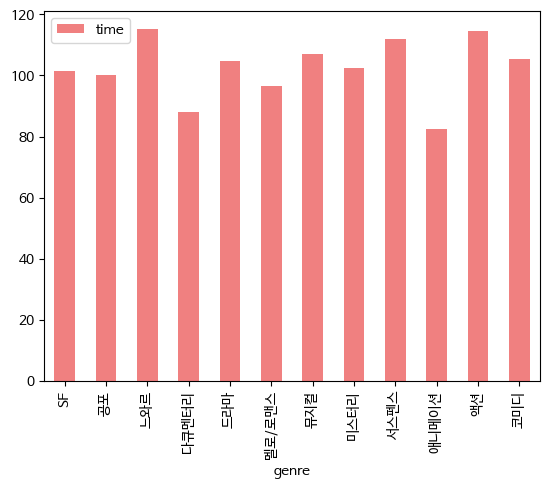

In [ ]:
train[['genre', 'time']].groupby('genre').mean().plot(kind='bar',color='lightcoral' )

그래프 해석
- 느와르, 서스펜스, 액션이 비교적 상영시간이 길다.
- 다큐멘터리, 애니메이션이 비교적 상영시간이 짧다.
- 그 외 장르들은 큰 차이 없이 100분 정도의 상영시간을 가진다.